In [1]:
import os

In [2]:
os.chdir("F:/Kaggle")

In [6]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt

In [4]:
print('Python : {}'.format(sys.version))

Python : 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


In [5]:
import sklearn

In [7]:
#Load the dataset

In [9]:
data = pd.read_csv('creditcard.csv')

In [12]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [13]:
print(data.shape)

(284807, 31)


In [15]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [16]:
data = data.sample(frac=.1,random_state = 1)

In [17]:
print(data.shape)

(28481, 31)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000985C048>,
      dtype=object)

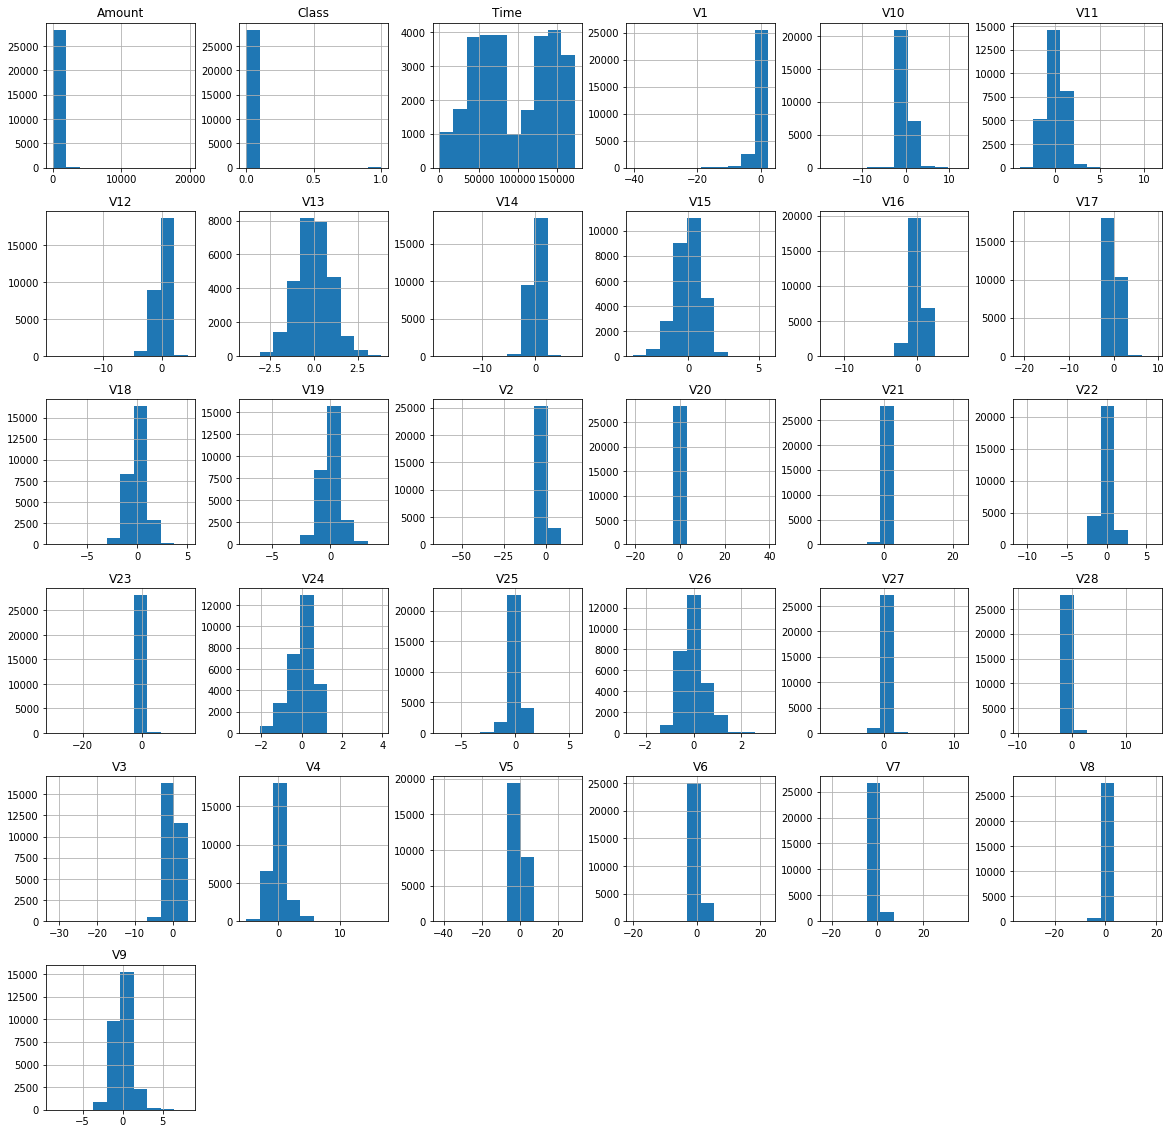

In [18]:
#Plot histogram of each parameter
data.hist(figsize = (20,20))

In [57]:
#Counting the no. of fraud cases in dataset
Fraud = data.loc[data['Class']== 1]
Valid = data.loc[data['Class']== 0]

outliar_fraction = float(len(Fraud)/len(Valid))


0.0017234102419808666


In [58]:
print(len(Valid))
print(len(Fraud))
print(outliar_fraction)

28432
49
0.0017234102419808666


In [63]:
print(type(data['Class']==1))
print(type(data[['Class']]==1))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


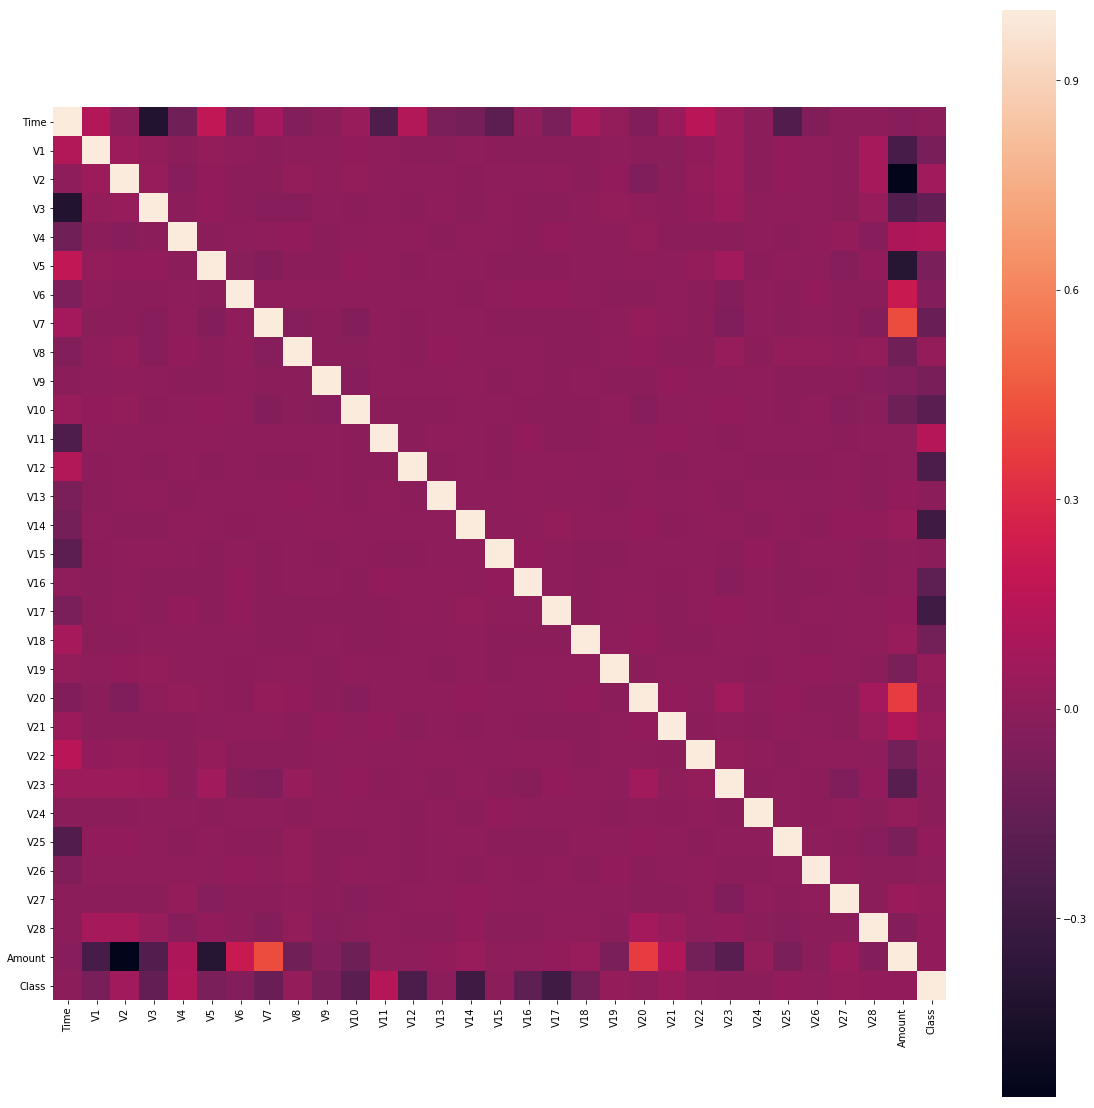

In [67]:
### Build a coorelation matrix
coor_matrix = data.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(coor_matrix,square=True)

In [69]:
#Get all the columns from dataframe
columns=data.columns.tolist()

In [73]:
#ilter the data we dont need
columns = [c for c in columns if c not in ['Class']]

#Store the variables we will be predicting in
target='Class'
X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [75]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [80]:
#Defining the random state
state = 1
#defining the outliar detection methods
classifier = {"Isolation Forest ": IsolationForest(max_samples=len(X),contamination=outliar_fraction),
              "Local Outliar Factor": LocalOutlierFactor(n_neighbors=20,contamination=outliar_fraction)}

In [84]:
#Fit the model
n_outliars = len(Fraud)

for i,(clf_name,clf) in enumerate(classifier.items()):
    if clf_name=="Local Outliar Factor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        y_pred=clf.predict(X)
        scores_pred=clf.decision_function(X)
    #Reshaping the predicted values
    y_pred[y_pred==1]= 0
    y_pred[y_pred==-1]= 1

    n_errors = (y_pred != Y).sum()

    #Run the classification matrix
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))
    

        

C:\Users\jarves\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Isolation Forest :77
0.9972964432428637
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.22      0.22      0.22        49

avg / total       1.00      1.00      1.00     28481

Local Outliar Factor:97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481



Local Outliar Factor:97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

